# 🏡 Dataset: Usecase 7 - Football Players Transfer Fee Prediction
# 📅 Date: 2025-03-03
# ✍️ Author: Sultan 

## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
#Read in the csv file and convert to a Pandas dataframe
football = pd.read_csv('Data/final_data.csv')

In [3]:
print(f"The shape is:{football.shape}")

The shape is:(10754, 22)


In [4]:
football.describe(include="object").T

count unique                                 top  freq
player    10754  10754  /david-de-gea/profil/spieler/59377     1
team      10754    374                Daejeon Hana Citizen    46
name      10754  10584                            Paulinho     6
position  10754     16                Defender Centre-Back  1821

## Preprocess the Data

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
football.head(10)

player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   
5      /harry-maguire/profil/spieler/177907  Manchester United   
6    /victor-lindelof/profil/spieler/184573  Manchester United   
7         /phil-jones/profil/spieler/117996  Manchester United   
8        /teden-mengi/profil/spieler/548470  Manchester United   
9          /luke-shaw/profil/spieler/183288  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   
5      Harry Maguire  Defender Centre-Back   194.0  30.0          68   
6    Victor Lindelöf  Defender Centre-Back   187.0  28.0          70   
7         Phil Jones  Defender Centre-Back   185.0  31.0           8   
8        Teden Mengi  Defender Centre-Back   186.0  21.0          34   
9          Luke Shaw    Defender Left-Back   178.0  27.0          74   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.009585  ...        1.217252      0.335463   
1  0.000000  0.000000      0.069018  ...        1.242331      0.207055   
2  0.000000  0.000000      0.000000  ...        0.616438      0.924658   
3  0.028090  0.056180      0.224719  ...        0.000000      0.000000   
4  0.017889  0.017889      0.053667  ...        0.000000      0.000000   
5  0.037799  0.000000      0.302394  ...        0.000000      0.000000   
6  0.000000  0.032901      0.115153  ...        0.000000      0.000000   
7  0.000000  0.000000      0.216346  ...        0.000000      0.000000   
8  0.000000  0.000000      0.130529  ...        0.000000      0.000000   
9  0.015374  0.169115      0.353604  ...        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   
2             292           697             84      4         600000   
3            6408           175             22      9       50000000   
4            5031           238             51     21       40000000   
5            4762           148             27      1       25000000   
6            5471            95             19     10       15000000   
7             416           932            169      7        2000000   
8            2758            47             13      0        2000000   
9            5854           443             70      4       35000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0  
3       50000000                 2       0  
4       80000000                 2       0  
5       70000000                 2       0  
6       35000000                 2       0  
7       20000000                 2       0  
8        2000000                 2       0  
9       42000000                 2       1  

[10 rows x 22 columns]

In [6]:
football['player'][0]

'/david-de-gea/profil/spieler/59377'

In [7]:
# Player Information  
# Name: Full name of the player Ex: (Lionel Messi The Goat).  
# Player ID: A unique identifier for the player, represented as a URL (/david-de-gea/profil/spieler/59377).  
# Team: The club the player currently plays for Ex: (Real Madrid).  
# Position: The primary position the player plays in (Goalkeeper, Defender, Midfielder, Forward).  
# Height: The player's height in cm.  
# Age: The player's age.  

# Performance Statistics  
# Appearances: Total matches played.  
# Goals: Total number of goals scored.  
# Assists: Number of assists provided.  
# Yellow Cards: Number of yellow cards received.  
# Second Yellow Cards: Number of times the player has received a second yellow (leading to a red card).  
# Red Cards: Number of direct red cards received.  

# Goalkeeper-Specific Stats (Applicable only to goalkeepers).
# Goals Conceded (Per Match): Average number of goals the player concedes per game.  
# Clean Sheets: Number of matches where the goalkeeper did not concede any goals.  

# Playing Time & Injuries  
# Minutes Played: Total minutes spent on the field (10 to 10,000+).  
# Days Injured: Number of days the player has been unavailable due to injuries.  
# Games Missed Due to Injury: Number of matches the player missed because of injuries.  

# Achievements & Market Value  
# Awards Won: Number of individual awards the player has received.  
# Current Market Value (€): The player’s estimated current market worth.  
# Highest Market Value (€): The highest recorded market value of the player.  

# Position Encoding & Winger Status  
# Position Encoding: A numerical representation of the player’s role:  
#   1 = Goalkeeper  
#   2 = Defender  
#   3 = Midfielder  
#   4 = Forward  
# Winger: Indicates whether the player primarily plays as a winger with two value (0 = No , 1 = Yes). 


#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.
__________________

In [8]:
# The Data Source is Transfermarkt: https://www.transfermarkt.com/ and it's a well-known football statistics and transfer market website.
# Which is leading us to indicate that Source is trustworthy in other word it's it's Reliabe.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.
_____________

In [9]:
# The data spans across the 2021-2022 and 2022-2023 seasons, providing relevant context for predicting player transfer prices.  

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.
____________


In [10]:
# Consistency in this dataset is maintained through standardized player metrics, ensuring uniformity in how data is recorded across seasons.  
# The player statistics, including goals, assists, injuries, and awards, are consistently represented, allowing for accurate comparisons and analysis over time.

#### 4. Relevance: 
_____________

In [11]:
# The dataset is highly relevant for analysis as it captures player performance metrics from the 2021-2023 seasons.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.
______________

In [12]:
# Display the duplicate rows and make sure there no duplicate rows accross the dataset
football[football.duplicated()]

Empty DataFrame
Columns: [player, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

[0 rows x 22 columns]

In [13]:
# Display the duplicate rows and make sure there no duplicate rows accross the dataset
football[football['player'].duplicated()]

Empty DataFrame
Columns: [player, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

[0 rows x 22 columns]

In [14]:
# Display the duplicate rows and make sure there no duplicate rows accross the dataset
football[football.duplicated(['name', 'position'], keep=False)].head(5)

player                 team  \
380   /rhys-williams/profil/spieler/503679         Liverpool FC   
385         /fabinho/profil/spieler/225693         Liverpool FC   
1052    /andre-silva/profil/spieler/198008           RB Leipzig   
1107    /luiz-felipe/profil/spieler/457931  Real Betis Balompié   
1194        /fernando/profil/spieler/51174           Sevilla FC   

               name                    position  height   age  appearance  \
380   Rhys Williams        Defender Centre-Back   195.0  22.0          39   
385         Fabinho  midfield-DefensiveMidfield   188.0  29.0          97   
1052    André Silva       Attack Centre-Forward   185.0  27.0          95   
1107    Luiz Felipe        Defender Centre-Back   187.0  26.0          70   
1194       Fernando  midfield-DefensiveMidfield   183.0  35.0          68   

         goals   assists  yellow cards  ...  goals conceded  clean sheets  \
380   0.093232  0.062155      0.248619  ...             0.0           0.0   
385   0.099571  0.037339      0.273821  ...             0.0           0.0   
1052  0.403379  0.263748      0.077573  ...             0.0           0.0   
1107  0.000000  0.015712      0.282821  ...             0.0           0.0   
1194  0.017199  0.034397      0.171985  ...             0.0           0.0   

      minutes played  days_injured  games_injured  award  current_value  \
380             2896            50             10      0        3000000   
385             7231           140             29      8       45000000   
1052            5801           221             15      4       20000000   
1107            5728           318             49      3       15000000   
1194            5233           516             75     19        3000000   

      highest_value  position_encoded  winger  
380         5000000                 2       0  
385        70000000                 3       0  
1052       45000000                 4       0  
1107       22000000                 2       0  
1194       17500000                 3       0  

[5 rows x 22 columns]

In [15]:
# Display the duplicate rows and make sure there no duplicate rows accross the dataset
football[football.duplicated(['name', 'position', 'team'], keep=False)]

Empty DataFrame
Columns: [player, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

[0 rows x 22 columns]

In [16]:
# The dataset reflects player transfers between the 2021-2022 and 2022-2023 seasons, with players appearing multiple times for different teams.  
# Each record represents a unique player-team-season combination, and no exact duplicate rows were found, ensuring accurate tracking of transfers.
# Thefore, The dataset is free of duplicate rows, ensuring data integrity and consistency throughout the analysis.

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.
___________

In [17]:
# Display number missing values per column
football.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [18]:
# The is dataset Clean and have no NaN values

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.


In [19]:
# check columns types 
football.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [20]:
# Filter players whose current value is 0 but had a nonzero highest value in the past
football[(football['current_value'] == 0)]#.value_counts().sum()

player               team  \
29      /mason-greenwood/profil/spieler/532826  Manchester United   
406         /sven-botman/profil/spieler/361093   Newcastle United   
407        /fabian-schar/profil/spieler/135343   Newcastle United   
408    /jamaal-lascelles/profil/spieler/183318   Newcastle United   
409        /matt-targett/profil/spieler/250478   Newcastle United   
...                                        ...                ...   
10581       /zahi-addis/profil/spieler/1069563      Brisbane Roar   
10586     /james-murphy/profil/spieler/1069560      Brisbane Roar   
10587       /riley-gill/profil/spieler/1069561      Brisbane Roar   
10686     /corey-hollman/profil/spieler/890186          Sydney FC   
10717       /joshua-mori/profil/spieler/541181    Adelaide United   

                   name                    position      height        age  \
29      Mason Greenwood          Attack-RightWinger  181.000000  21.000000   
406         Sven Botman        Defender Centre-Back  195.000000  23.000000   
407        Fabian Schär        Defender Centre-Back  186.000000  31.000000   
408    Jamaal Lascelles        Defender Centre-Back  188.000000  29.000000   
409        Matt Targett          Defender Left-Back  183.000000  27.000000   
...                 ...                         ...         ...        ...   
10581        Zahi Addis          Defender Left-Back  181.240353  19.000000   
10586      James Murphy                    midfield  181.240353  17.000000   
10587        Riley Gill                    midfield  181.240353  26.041903   
10686     Corey Hollman  midfield-DefensiveMidfield  181.240353  19.000000   
10717       Joshua Mori                      Attack  180.000000  26.000000   

       appearance     goals   assists  yellow cards  ...  goals conceded  \
29             24  0.317647  0.105882      0.105882  ...             0.0   
406            76  0.041159  0.013720      0.123476  ...             0.0   
407            67  0.045678  0.076129      0.182710  ...             0.0   
408            38  0.068992  0.000000      0.310464  ...             0.0   
409            54  0.023747  0.023747      0.094987  ...             0.0   
...           ...       ...       ...           ...  ...             ...   
10581           0  0.000000  0.000000      0.000000  ...             0.0   
10586           0  0.000000  0.000000      0.000000  ...             0.0   
10587           0  0.000000  0.000000      0.000000  ...             0.0   
10686           1  0.000000  0.000000      0.000000  ...             0.0   
10717           1  0.000000  0.000000      0.000000  ...             0.0   

       clean sheets  minutes played  days_injured  games_injured  award  \
29              0.0            1700           135             12      0   
406             0.0            6560           118             19      4   
407             0.0            5911           285             30      3   
408             0.0            2609           418             57      2   
409             0.0            3790           380             66      0   
...             ...             ...           ...            ...    ...   
10581           0.0               0             0              0      0   
10586           0.0               0             0              0      0   
10587           0.0               0             0              0      0   
10686           0.0               3             0              0      0   
10717           0.0               0             0              0      0   

       current_value  highest_value  position_encoded  winger  
29                 0       50000000                 4       1  
406                0              0                 2       0  
407                0              0                 2       0  
408                0              0                 2       0  
409                0              0                 2       1  
...              ...            ...               ...     ...  
10581       

In [21]:
# Filter players whose current value is 0 but had a nonzero highest value in the past
football[(football['current_value'] == 0) & (football['highest_value'] != 0)]#.value_counts().sum()

player  \
29              /mason-greenwood/profil/spieler/532826   
440              /benjamin-mendy/profil/spieler/157495   
1738              /orji-okwonkwo/profil/spieler/401935   
1751                /armando-izzo/profil/spieler/32113   
2101          /mohamed-ihattaren/profil/spieler/503638   
3422            /marcos-vinicius/profil/spieler/594006   
3504           /henrique-dourado/profil/spieler/270959   
3550              /patric-calmon/profil/spieler/373192   
7462                  /cj-fodrey/profil/spieler/881090   
8233            /sebastian-villa/profil/spieler/493000   
8417          /shinnosuke-fukuda/profil/spieler/576454   
8490                  /ken-masui/profil/spieler/578655   
8491          /kyota-sakakibara/profil/spieler/1014014   
8622            /masahiro-okamoto/profil/spieler/49351   
8684            /kakeru-yamauchi/profil/spieler/566010   
8709                 /shuma-kido/profil/spieler/781902   
8740            /naoya-takahashi/profil/spieler/617382   
8773              /kazuhiko-chiba/profil/spieler/31065   
8799             /eui-jeong-park/profil/spieler/947669   
8832             /takuto-hayashi/profil/spieler/126383   
8852             /kosei-shibasaki/profil/spieler/83930   
8896               /ibuki-konno/profil/spieler/1049591   
8929          /nawaf-al-dawsari/profil/spieler/1005501   
8950           /saad-al-muwallad/profil/spieler/974930   
8951             /abdullah-saeed/profil/spieler/921111   
8952           /nasser-al-bishi/profil/spieler/1009026   
8964   /bela-mousa-ali-al-dawaa/profil/spieler/1020848   
8974             /saad-al-khairy/profil/spieler/487475   
8978           /majed-al-najrani/profil/spieler/264827   
8992           /yazeed-al-sayyah/profil/spieler/364414   
9007          /rakan-al-tulayhi/profil/spieler/1003583   
9018      /khalid-al-muntashiri/profil/spieler/1003585   
9093                /bader-nawaf/profil/spieler/922446   
9163               /osama-ashoor/profil/spieler/153218   
9171          /tariq-al-shahrani/profil/spieler/901134   
9175               /musab-habkor/profil/spieler/944184   
9220          /mutlaq-al-hurayji/profil/spieler/998315   
9246           /basil-al-bahrani/profil/spieler/901152   
9328       /suwailem-al-manhali/profil/spieler/1060927   
9419            /majed-qasheesh/profil/spieler/1065823   
9719                 /ju-ho-park/profil/spieler/111900   
10513              /pierce-clark/profil/spieler/466944   

                             team                     name  \
29              Manchester United          Mason Greenwood   
440               Manchester City           Benjamin Mendy   
1738              Bologna FC 1909            Orji Okwonkwo   
1751                     AC Monza             Armando Izzo   
2101                  Juventus FC        Mohamed Ihattaren   
3422      Coritiba Foot Ball Club          Marcos Vinícius   
3504       Cruzeiro Esporte Clube         Henrique Dourado   
3550    Cuiabá Esporte Clube (MT)            Patric Calmon   
7462                    Austin FC                CJ Fodrey   
8233              CA Boca Juniors          Sebastián Villa   
8417                  Kyoto Sanga        Shinnosuke Fukuda   
8490               Nagoya Grampus                Ken Masui   
8491               Nagoya Grampus         Kyota Sakakibara   
8622                   Sagan Tosu         Masahiro Okamoto   
8684                  Vissel Kobe          Kakeru Yamauchi   
8709   Hokkaido Consadole Sapporo               Shuma Kido   
8740              Shonan Bellmare          Naoya Takahashi   
8773              Albirex Niigata           Kazuhiko Chiba   
8799              Kashima Antlers           Eui-jeong Park   
8832          Sanfrecce Hiroshima           Takuto Hayashi   
8852          Sanfrecce Hiroshima          Kosei Shibasaki   
8896                  Gamba Osaka              Ibuki Konno   
8929      Al-Shabab Club (Riyadh)         Nawaf Al-Dawsari   
8950      Al-Shabab Club (Riyadh)         Saad Al-Muwallad   
895

In [22]:
# Drop players where both current_value and highest_value are 0
football = football[~((football['current_value'] == 0) & (football['highest_value'] == 0))]

# Players with current_value = 0 but highest_value ≠ 0 may be due to penalties

In [23]:
# Add a new column 'penalty_flag' to indicate possible penalties
football['penalty_flag'] = ((football['current_value'] == 0) & (football['highest_value'] != 0)).astype(int)
football[(football['current_value'] == 0) & (football['highest_value'] != 0)].head()

player               team  \
29      /mason-greenwood/profil/spieler/532826  Manchester United   
440      /benjamin-mendy/profil/spieler/157495    Manchester City   
1738      /orji-okwonkwo/profil/spieler/401935    Bologna FC 1909   
1751        /armando-izzo/profil/spieler/32113           AC Monza   
2101  /mohamed-ihattaren/profil/spieler/503638        Juventus FC   

                   name                    position  height   age  appearance  \
29      Mason Greenwood          Attack-RightWinger   181.0  21.0          24   
440      Benjamin Mendy          Defender Left-Back   185.0  28.0           2   
1738      Orji Okwonkwo          Attack-RightWinger   180.0  25.0          21   
1751       Armando Izzo        Defender Centre-Back   183.0  31.0          44   
2101  Mohamed Ihattaren  midfield-AttackingMidfield   183.0  21.0           6   

         goals   assists  yellow cards  ...  clean sheets  minutes played  \
29    0.317647  0.105882      0.105882  ...           0.0            1700   
440   0.000000  0.000000      0.000000  ...           0.0             169   
1738  0.478088  0.119522      0.119522  ...           0.0            1506   
1751  0.028754  0.028754      0.402556  ...           0.0            3130   
2101  1.304348  0.652174      0.000000  ...           0.0             276   

      days_injured  games_injured  award  current_value  highest_value  \
29             135             12      0              0       50000000   
440            696            121     13              0       45000000   
1738           143             22      2              0        2000000   
1751           242             43      1              0       25000000   
2101             0              0      3              0       22000000   

      position_encoded  winger  penalty_flag  
29                   4       1             1  
440                  2       1             1  
1738                 4       1             1  
1751                 2       0             1  
2101                 3       0             1  

[5 rows x 23 columns]

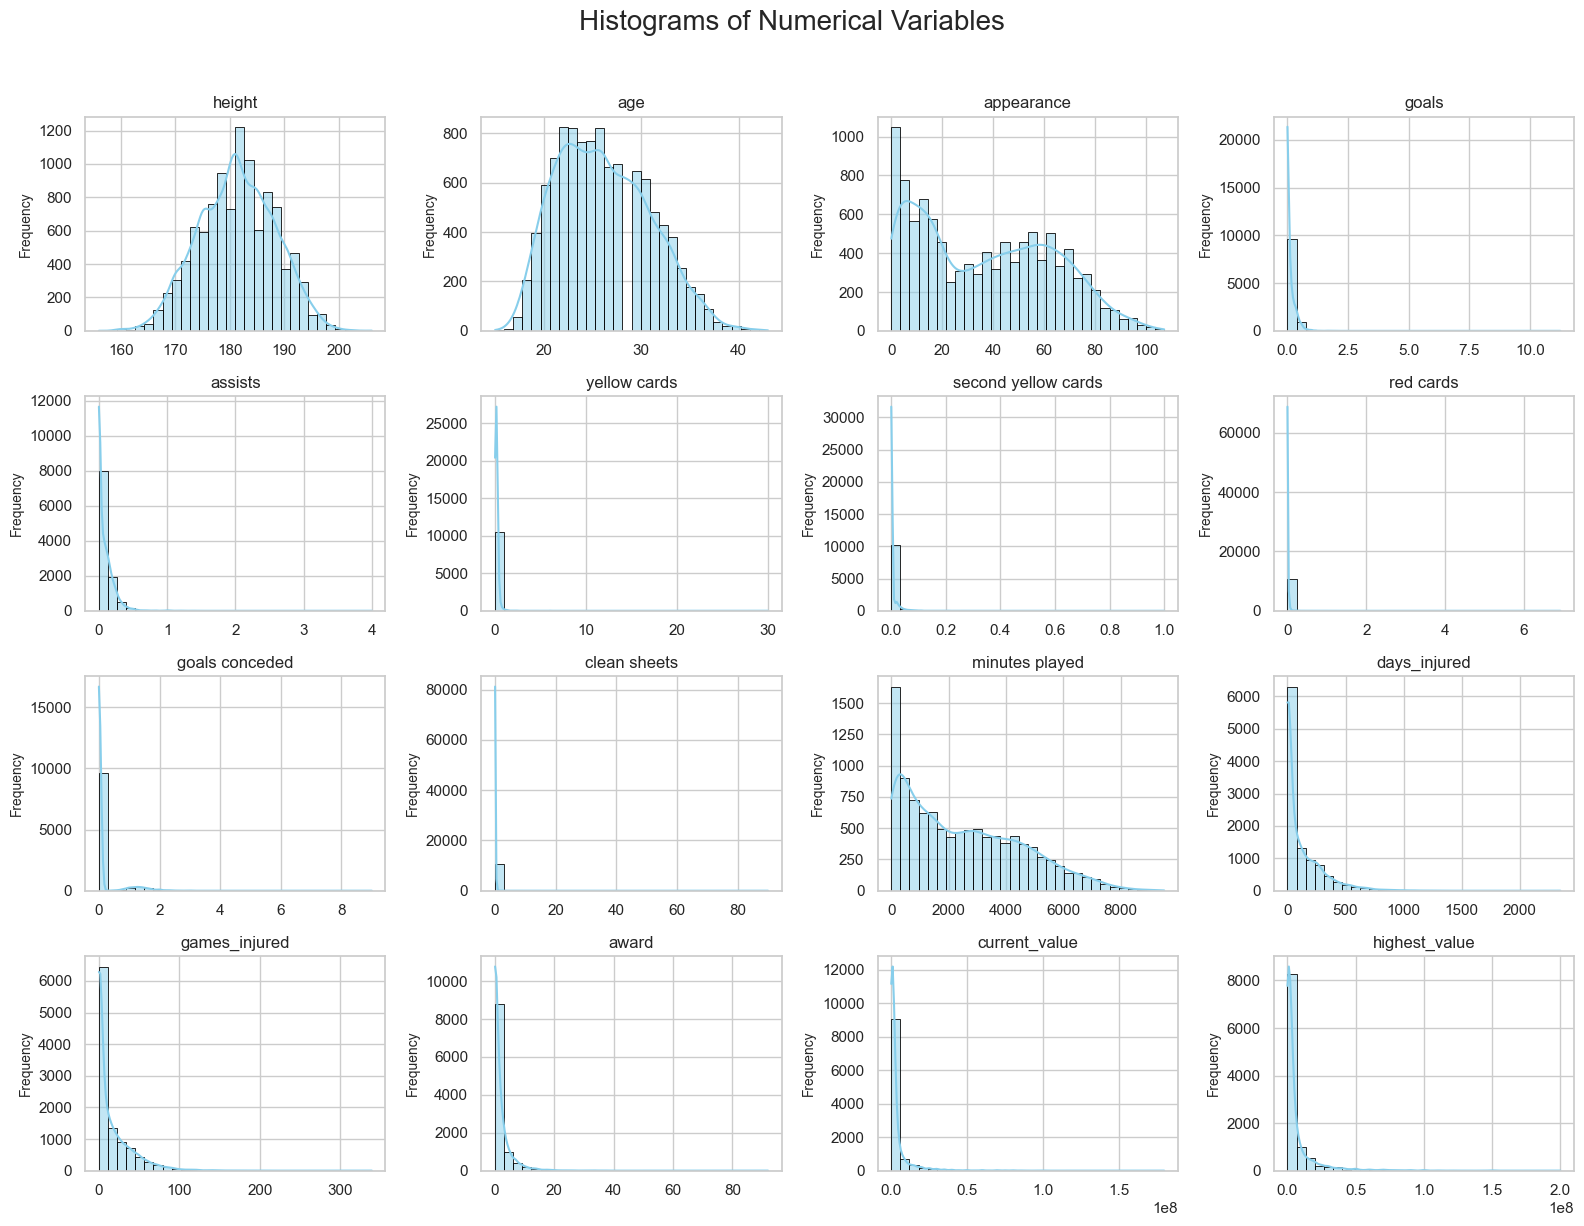

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
    'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value'
]

# Set the aesthetic style of the plots
sns.set(style="whitegrid", palette="pastel")

# Set up the figure for histograms
plt.figure(figsize=(16, 12))  # Increased figure size for better spacing
plt.suptitle("Histograms of Numerical Variables", fontsize=20, y=1.02)  # Added a super title

# Loop through each numerical column and create histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Organize subplots in a 4x4 grid
    sns.histplot(football[col], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(col, fontsize=12)  # Add column name as title
    plt.xlabel("")  # Remove x-axis label for cleaner look
    plt.ylabel("Frequency", fontsize=10)  # Add y-axis label

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [25]:
football.drop(columns=["name","player"],inplace=True)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [26]:
football.head(2)

team    position  height   age  appearance  goals  assists  \
0  Manchester United  Goalkeeper   189.0  32.0         104    0.0      0.0   
1  Manchester United  Goalkeeper   196.0  30.0          15    0.0      0.0   

   yellow cards  second yellow cards  red cards  ...  clean sheets  \
0      0.009585                  0.0        0.0  ...      0.335463   
1      0.069018                  0.0        0.0  ...      0.207055   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   

   highest_value  position_encoded  winger  penalty_flag  
0       70000000                 1       0             0  
1       22000000                 1       0             0  

[2 rows x 21 columns]

In [27]:
# Numerical Columns (Quantitative Features)
# These columns contain continuous or discrete numerical values used for statistical analysis,
# correlation studies, and machine learning models. They represent measurable quantities.

numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
    'minutes played', 'days_injured', 'games_injured', 'award',
    'current_value', 'highest_value', 'position_encoded', 'winger', 'penalty_flag'
    
]

# Categorical Columns (Qualitative Features)
# These columns represent categories or labels. They are used for classification tasks, grouping,
# and often need to be transformed into numerical values
# during preprocessing for machine learning models.
categorical_columns = [
     'team', 'position'
]

In [28]:
categorical_columns

['team', 'position']

In [29]:
# one hot coding
df = pd.get_dummies(football, columns=categorical_columns)

In [30]:
df.shape

(10629, 409)

In [31]:
df.head(2)

height   age  appearance  goals  assists  yellow cards  \
0   189.0  32.0         104    0.0      0.0      0.009585   
1   196.0  30.0          15    0.0      0.0      0.069018   

   second yellow cards  red cards  goals conceded  clean sheets  ...  \
0                  0.0        0.0        1.217252      0.335463  ...   
1                  0.0        0.0        1.242331      0.207055  ...   

   position_Defender Centre-Back  position_Defender Left-Back  \
0                          False                        False   
1                          False                        False   

   position_Defender Right-Back  position_Goalkeeper  position_midfield  \
0                         False                 True              False   
1                         False                 True              False   

   position_midfield-AttackingMidfield  position_midfield-CentralMidfield  \
0                                False                              False   
1                                False                              False   

   position_midfield-DefensiveMidfield  position_midfield-LeftMidfield  \
0                                False                           False   
1                                False                           False   

   position_midfield-RightMidfield  
0                            False  
1                            False  

[2 rows x 409 columns]

In [35]:
encoder = LabelEncoder()
football['current_value_category_encoded'] = encoder.fit_transform(football['current_value_category'])

In [36]:
football["current_value_category_encoded"]

0        0
1        1
2        1
3        0
4        0
        ..
10749    2
10750    2
10751    2
10752    2
10753    2
Name: current_value_category_encoded, Length: 10629, dtype: int32

#### 3. Feature selection

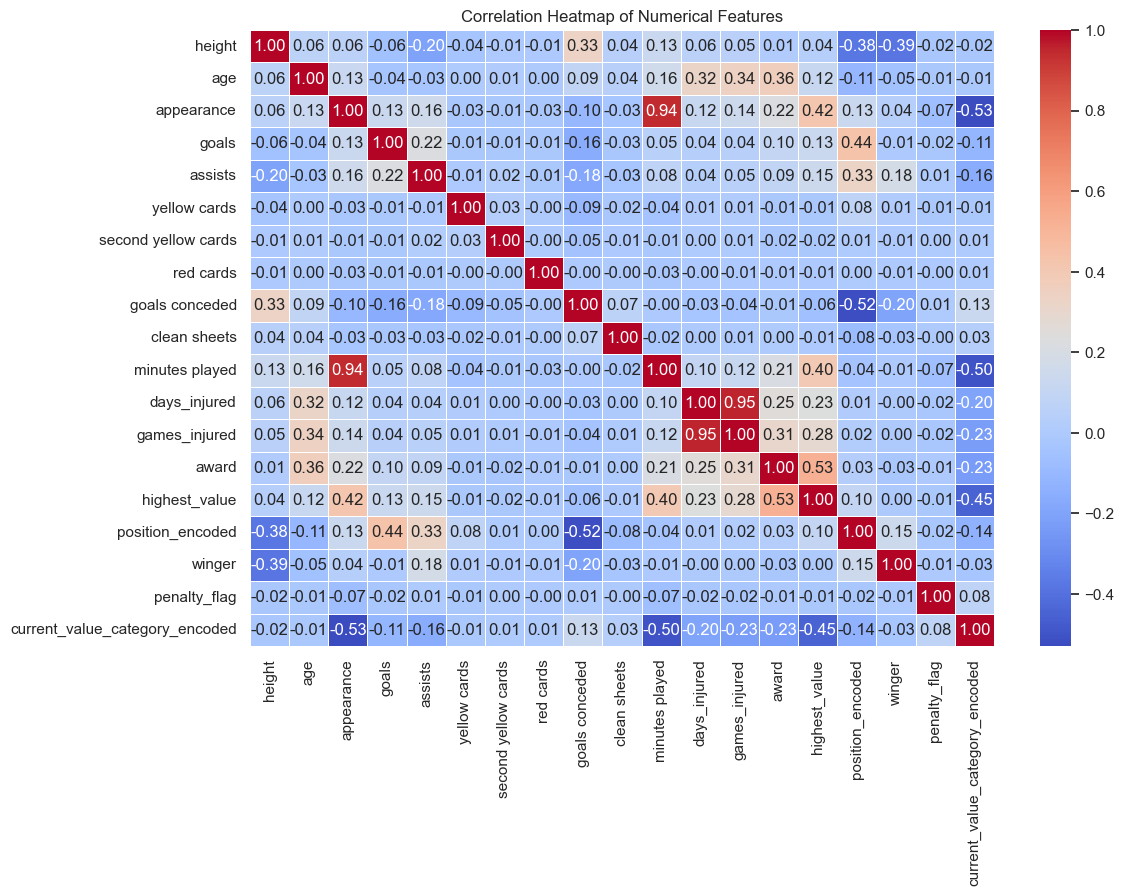

In [37]:
# Extract numerical columns from the DataFrame
numerical_columns = football.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = football[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [34]:
# The features most correlated with 'current_value' are 'appearance' and 'minutes played', 
# both showing correlations around 0.4, followed by 'award'.
# Other positively correlated features include 'goals', 'assists', 'days_injured', and 'games_injured'.
# This indicates that player values are strongly influenced by their performance metrics.
# 'highest_value' shows a different correlation pattern.

In [57]:
df = football[['appearance', 'minutes played', 'award', 'current_value', 'highest_value'  ]]

In [58]:
df.shape

(10629, 5)

#### 4. Prepare train and test data

In [59]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
X.shape

(10629, 5)

## Buliding the Model

In [61]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

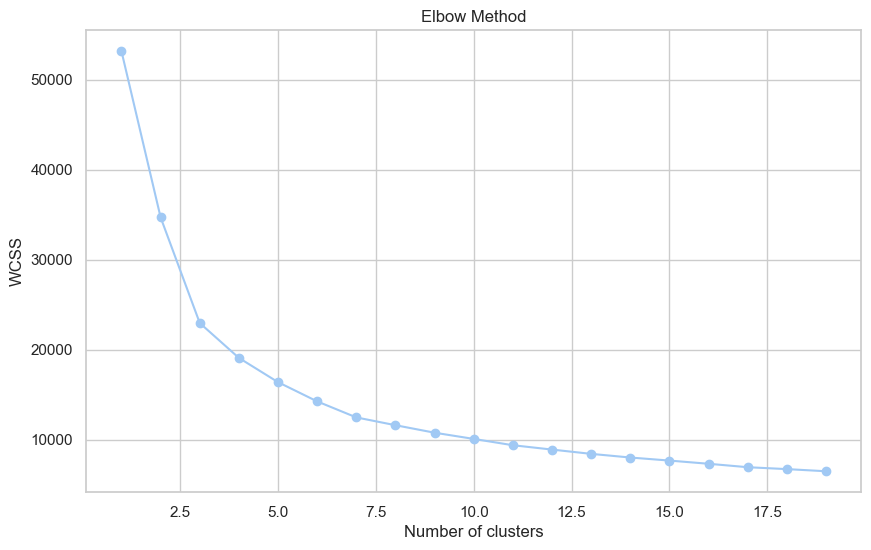

In [62]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [63]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 6 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [64]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [65]:
X.head(2)

appearance  minutes played  award  current_value  highest_value
0         104            9390     13       15000000       70000000
1          15            1304      1        1500000       22000000

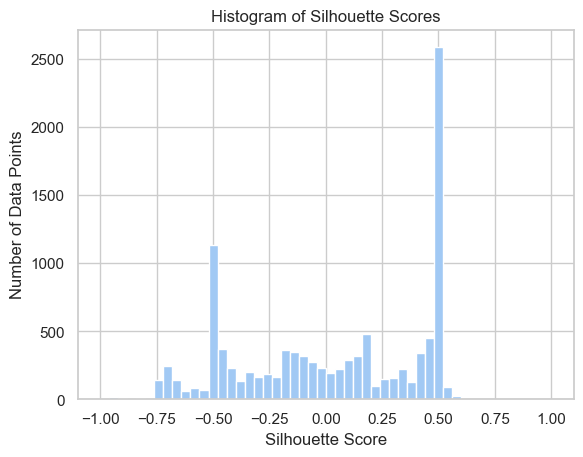

Silhouette average score: 0.033203464123205156


In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [67]:
silhouette_scores

array([ 0.08825901, -0.16077146,  0.02611226, ...,  0.50648272,
        0.50648426,  0.50290102])

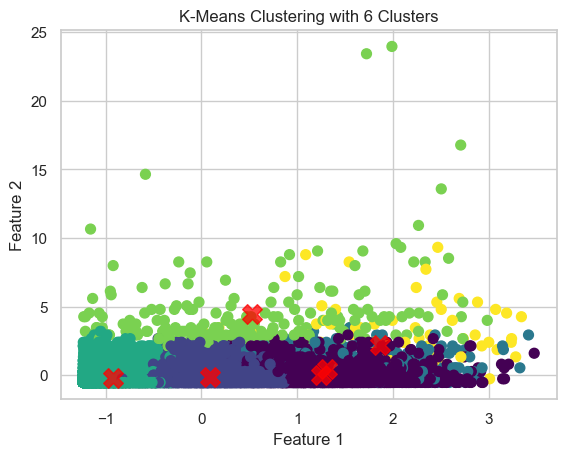

In [68]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [69]:
X['kmeans'] = y_pred

In [70]:
X['kmeans'].value_counts()

kmeans
3    4492
1    3009
0    2215
2     598
4     209
5     106
Name: count, dtype: int64

In [71]:
X[X['kmeans']==0]

appearance  minutes played  award  current_value  highest_value  kmeans
33             75            6623      4        1000000        9000000       0
39             80            6421      1        2500000       12000000       0
40             64            4605      1       12000000       12000000       0
41             72            5740      5        9000000       12000000       0
44             74            4528      1        8000000        8000000       0
...           ...             ...    ...            ...            ...     ...
10708          57            4903      0         200000        3000000       0
10711          53            4454      3         200000         750000       0
10718          55            4601      3        1500000        1500000       0
10727          51            4590      2         500000        1000000       0
10732          50            4226      4         250000        1500000       0

[2215 rows x 6 columns]

<Axes: xlabel='current_value', ylabel='appearance'>

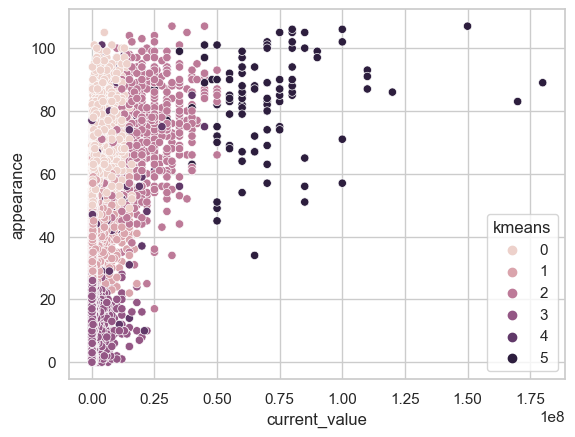

In [74]:
sns.scatterplot(data = X , x = 'current_value', y = 'minutes played', hue = 'kmeans')

<Axes: xlabel='award', ylabel='current_value'>

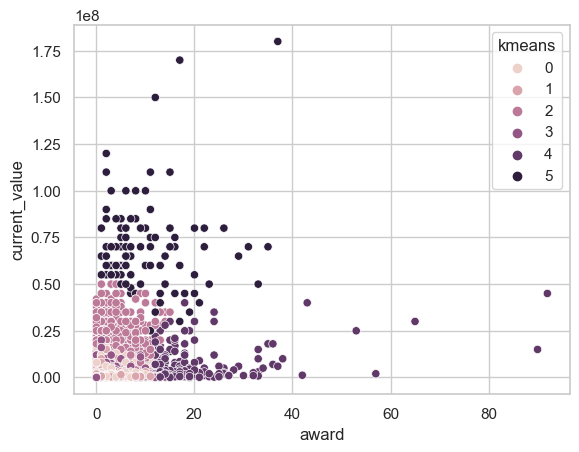

In [75]:
sns.scatterplot(data = X , x = 'award', y = 'current_value', hue = 'kmeans')

In [77]:
import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='highest_value', y='award', z='current_value',
              color='kmeans')
fig.show()